In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import data
df= pd.read_csv('data.csv')
df.head()

,Line Energy,Area Energy,Energy Density,Radius,Radius Deviation,Surface Morphology
0,1.41,5.64,81,4.170,1.17,Flat
1,0.62,2.48,35,3.870,0.87,Porous
2,0.35,1.39,20,3.605,0.61,Porous
3,1.05,4.21,60,4.195,1.20,Flat
4,1.88,7.54,108,3.645,0.65,Flat


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Line Energy         11 non-null     float64
 1   Area Energy         11 non-null     float64
 2   Energy Density      11 non-null     int64  
 3   Radius              11 non-null     float64
 4   Radius Deviation    11 non-null     float64
 5   Surface Morphology  11 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 656.0+ bytes


# Preprocessing
|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

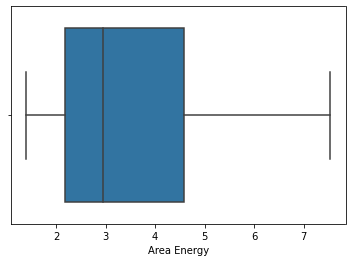

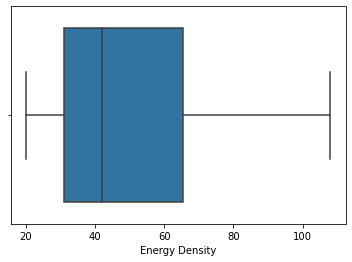

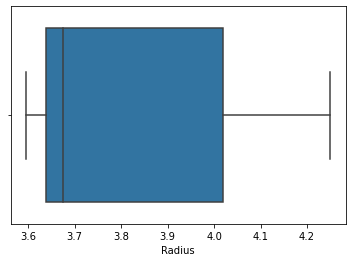

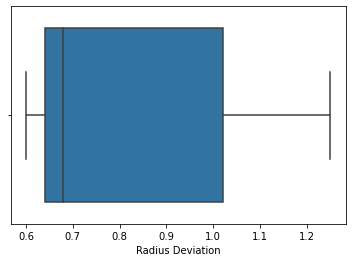

TypeError: Horizontal orientation requires numeric `x` variable.

In [9]:
# Check outlier
import seaborn as sns
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplot(i)

In [10]:
df.columns

Index(['Line Energy', 'Area Energy', 'Energy Density', 'Radius',
       'Radius Deviation', 'Surface Morphology'],
      dtype='object')

In [12]:
x= df[['Line Energy', 'Area Energy', 'Energy Density', 'Radius',
       'Radius Deviation']]
y= df[['Surface Morphology']]

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [17]:
df['Surface Morphology'].value_counts()

Flat      6
Porous    5
Name: Surface Morphology, dtype: int64

In [18]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred_train= logit_model.predict(x_train)
y_pred_test= logit_model.predict(x_test)

In [22]:
# Evaluation model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
print(confusion_matrix(y_train, y_pred_train))
print('.....................................')
print(confusion_matrix(y_test, y_pred_test))

[[4 0]
 [1 3]]
.....................................
[[2 0]
 [0 1]]


In [24]:
print(classification_report(y_train, y_pred_train))
print('.....................................')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Flat       0.80      1.00      0.89         4
      Porous       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8

.....................................
              precision    recall  f1-score   support

        Flat       1.00      1.00      1.00         2
      Porous       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [25]:
print(accuracy_score(y_train, y_pred_train))
print('.....................................')
print(accuracy_score(y_test, y_pred_test))

0.875
.....................................
1.0


## Lazipredict

In [26]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 51.83it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
SVC                                1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
Perceptron                         1.00               1.00    None      1.00   
NuSVC                              1.00               1.00    None      1.00   
NearestCentroid                    1.00               1.00    None      1.00   
LogisticRegression                 1.00               1.00    None      1.00   
LinearSVC                          1.00 

## XGB

In [28]:
from xgboost import XGBClassifier
xgb= XGBClassifier()

In [30]:
df= pd.get_dummies(df, columns=['Surface Morphology'])
df.head()

,Line Energy,Area Energy,Energy Density,Radius,Radius Deviation,Surface Morphology_Flat,Surface Morphology_Porous
0,1.41,5.64,81,4.17,1.17,1,0
1,0.62,2.48,35,3.87,0.87,0,1
2,0.35,1.39,20,3.60,0.61,0,1
3,1.05,4.21,60,4.20,1.20,1,0
4,1.88,7.54,108,3.65,0.65,1,0


In [31]:
x= df[['Line Energy', 'Area Energy', 'Energy Density', 'Radius',
       'Radius Deviation']]
y= df[['Surface Morphology_Flat']]

In [32]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [33]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
y_pred_train_xgb= xgb.predict(x_train)
y_pred_test_xgb= xgb.predict(x_test)

In [35]:
print(confusion_matrix(y_train, y_pred_train_xgb))
print('.....................................')
print(confusion_matrix(y_test, y_pred_test_xgb))

[[4 0]
 [0 4]]
.....................................
[[1 0]
 [0 2]]


In [36]:
print(classification_report(y_train, y_pred_train_xgb))
print('.....................................')
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

.....................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [37]:
print(accuracy_score(y_train, y_pred_train_xgb))
print('.....................................')
print(accuracy_score(y_test, y_pred_test_xgb))

1.0
.....................................
1.0


## SVC

In [38]:
from sklearn.svm import SVC
svc= SVC()

In [39]:
svc.fit(x_train, y_train)

SVC()

In [40]:
y_pred_train_svc= xgb.predict(x_train)
y_pred_test_svc= xgb.predict(x_test)

In [41]:
print(confusion_matrix(y_train, y_pred_train_svc))
print('.....................................')
print(confusion_matrix(y_test, y_pred_test_svc))

[[4 0]
 [0 4]]
.....................................
[[1 0]
 [0 2]]


In [42]:
print(classification_report(y_train, y_pred_train_svc))
print('.....................................')
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

.....................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [43]:
print(accuracy_score(y_train, y_pred_train_svc))
print('.....................................')
print(accuracy_score(y_test, y_pred_test_svc))

1.0
.....................................
1.0


### Conclusion
- SVC and XGB have accuracy as 100%, therefore good for classification.